#Importación de librerias


In [ ]:
# https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

#1)  Introduccion

Encuesta Anual de Hogares (EAH)
Esta es una encuesta anual que realiza la DGESYC desde 2002. Se trata de un operativo por muestreo que involucra un número importante de viviendas particulares distribuidas en el territorio de la Ciudad. La muestra está diseñada de manera tal que los resultados de la encuesta permiten una representatividad del total de la Ciudad y de cada una de sus comunas. De esta forma se propone recabar datos para conocer y analizar la situación socioeconómica y demográfica de la población y de los hogares de la Ciudad. Conocer la situación del mercado laboral, el estado y la dinámica demográfica de la población es necesario para el diseño informado de la gestión pública. (Dirección General de Estadística y Censos del Gobierno de la Ciudad de Buenos Aires, 2021)

El conjunto de datos utilizado para estos analisis, son los datos de la encuesta realizada en el año 2019, utilizando solo los registros pertenecientes al jefe de familia para disminuir el conjunto de datos, siendo un total de 5749 registros distribuidos en 29 columnas de los cuales:



*   10 Columnas representan a variables Cuantitativas: Id, Comuna, Edad, Ingreso total laboral, Ingreso total no laboral, Ingresos totales, Ingresos familiares, Ingreso per capita familiar, años escolaridad y Cantidad de hijos nacidos vivos

*   19 Columnas representan variables Cualitativas: Dominio, Sexo, Parentezco, Situacion conyugal, Num. miembro padre, Num. miembro madre, Estado ocupacional, Cat. Ocupacional, Calidad ingreso laboral, Calidad ingreso no laboral, Calidad ingresos totales, Calidad ingresos familiares, Estado educativo, Sector educativo, Nivel actual, Nivel max educativo, Lugar de Nacimiento, Afiliacion salud, Hijos nacidos vivos.





##a) Carga de DataFrame

In [ ]:
#Este código abrirá un botón para seleccionar archivos.
#Una vez que hayas seleccionado el archivo Excel que deseas cargar, se almacenará en el diccionario uploaded.
from google.colab import files

# Seleccionar el archivo desde tu sistema local
uploaded = files.upload()


Saving encuesta-anual-hogares-2019.xlsx to encuesta-anual-hogares-2019.xlsx


In [ ]:
datos=pd.read_excel('encuesta-anual-hogares-2019.xlsx')
datos

,id,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,5041,14,Resto de la Ciudad,74,Mujer,Jefe,Viudo/a,No corresponde,No corresponde,Inactivo,...,500000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17.0,CABA,Otros,Si,2
1,1663,2,Resto de la Ciudad,75,Mujer,Padre/Madre/Suegro/a,Divorciado/a,No corresponde,No corresponde,Inactivo,...,200000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,19.0,Otra provincia,Solo plan de medicina prepaga por contratación...,Si,3
2,4627,1,Resto de la Ciudad,69,Mujer,Jefe,Casado/a,No corresponde,No corresponde,Inactivo,...,250000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,19.0,CABA,Solo obra social,Si,2
3,5760,10,Resto de la Ciudad,91,Varon,Jefe,Casado/a,No corresponde,No corresponde,Inactivo,...,119750,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12.0,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
4,4623,14,Resto de la Ciudad,69,Mujer,Jefe,Divorciado/a,No corresponde,No corresponde,Ocupado,...,483000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,19.0,CABA,Solo plan de medicina prepaga por contratación...,Si,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,5118,14,Resto de la Ciudad,75,Varon,Jefe,Casado/a,No corresponde,No corresponde,Ocupado,...,29000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17.0,Otra provincia,Solo obra social,NaN,No corresponde
5791,5130,14,Resto de la Ciudad,75,Varon,Jefe,Soltero/a,No corresponde,No corresponde,Ocupado,...,60000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17.0,CABA,Solo prepaga o mutual via OS,NaN,No corresponde
5792,5137,1,Resto de la Ciudad,75,Varon,Jefe,Casado/a,No corresponde,No corresponde,Ocupado,...,89000,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,19.0,CABA,Otros,NaN,No corresponde
5793,5201,3,Resto de la Ciudad,76,Varon,Jefe,Casado/a,No corresponde,No corresponde,Ocupado,...,58750,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,19.0,Partido GBA,Solo prepaga o mutual via OS,NaN,No corresponde


###Tipo de variables del Data Frame

In [ ]:
datos.dtypes

id                               int64
comuna                           int64
dominio                         object
edad                             int64
sexo                            object
parentesco_jefe                 object
situacion_conyugal              object
num_miembro_padre               object
num_miembro_madre               object
estado_ocupacional              object
cat_ocupacional                 object
calidad_ingresos_lab            object
ingreso_total_lab                int64
calidad_ingresos_no_lab         object
ingreso_total_no_lab             int64
calidad_ingresos_totales        object
ingresos_totales                 int64
calidad_ingresos_familiares     object
ingresos_familiares              int64
ingreso_per_capita_familiar      int64
estado_educativo                object
sector_educativo                object
nivel_actual                    object
nivel_max_educativo             object
años_escolaridad               float64
lugar_nacimiento         

###Generamos un nuevo dataframe
Creamos 'datos_analisis', un dataframe que contenga solo aquellas variables cuantitativas de interes.

In [ ]:
datos_analisis = datos[['años_escolaridad', 'edad', 'ingreso_total_lab','ingreso_total_no_lab', 'ingresos_totales']]
datos_analisis

,años_escolaridad,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales
0,17.0,74,0,500000,500000
1,19.0,75,0,300000,300000
2,19.0,69,0,250000,250000
3,12.0,91,0,227500,227500
4,19.0,69,265000,218000,483000
...,...,...,...,...,...
5790,17.0,75,50000,0,50000
5791,17.0,75,60000,0,60000
5792,19.0,75,105000,0,105000
5793,19.0,76,101000,0,101000


##b) Analisis descriptivo de las Variables


###Variables Cuantitativas
Graficos 1, 2 y 3: Frecuencia de las variables Numericas


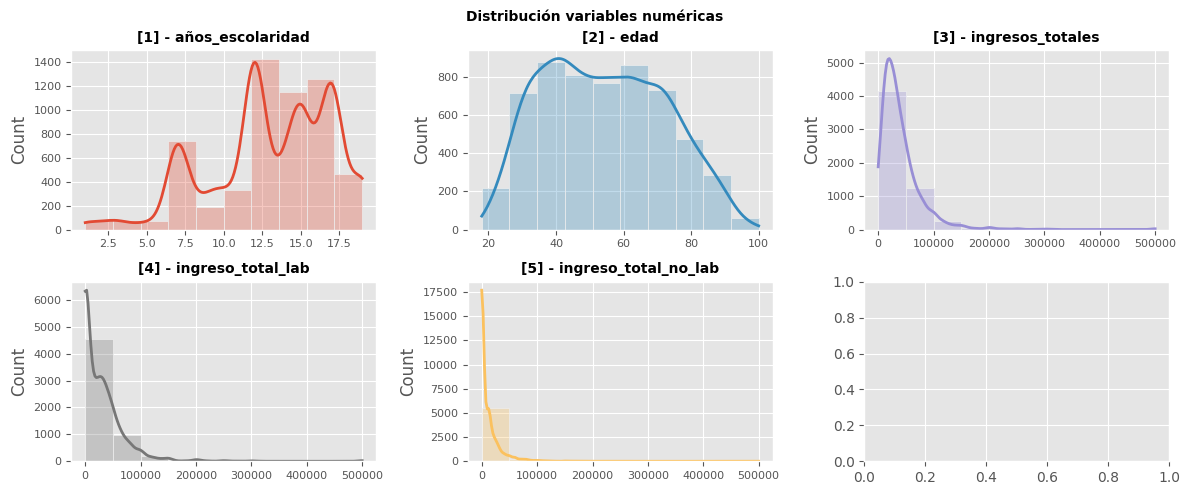

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_numeric = ['años_escolaridad','edad','ingresos_totales','ingreso_total_lab','ingreso_total_no_lab']

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos_analisis,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i],
        bins = 10
    )
    axes[i].set_title(str([i+1])+" - "+colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")



fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

####Tabla Numero 1: Resumen estadístico descriptivo variables numericas



In [ ]:
datos_analisis.describe().round(2)

,años_escolaridad,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales
count,5795.00,5795.00,5795.00,5795.00,5795.00
mean,13.02,54.28,29806.67,11167.43,40951.15
std,3.99,17.95,40807.19,21541.98,42066.49
min,1.00,18.00,0.00,0.00,0.00
25%,11.00,39.00,0.00,0.00,16000.00
50%,13.00,54.00,20000.00,0.00,30000.00
75%,17.00,69.00,44000.00,14000.00,50000.00
max,19.00,100.00,500000.00,500000.00,500000.00


#2) Analisis de la relación que existe entre las variables

###a) Analisis mediante el coeficiente de correlacion de Pearson

El análisis de correlación de Pearson es una técnica estadística que mide la fuerza y dirección de la relación lineal entre dos variables continuas. Este análisis se utiliza para determinar si existe una asociación entre las variables y en qué medida están relacionadas.


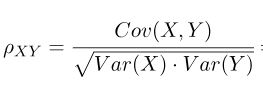

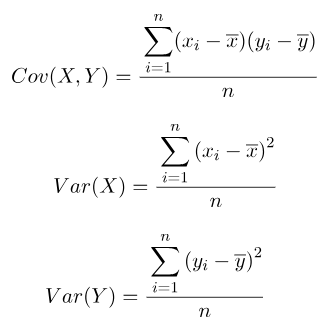



In [ ]:
datos_analisis.corr(method='pearson')

,años_escolaridad,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales
años_escolaridad,1.000000,-0.257266,0.403235,0.014834,0.398199
edad,-0.257266,1.000000,-0.270219,0.444319,-0.034912
ingreso_total_lab,0.403235,-0.270219,1.000000,-0.191984,0.865463
ingreso_total_no_lab,0.014834,0.444319,-0.191984,1.000000,0.324942
ingresos_totales,0.398199,-0.034912,0.865463,0.324942,1.000000


Con estos analisis podemos observar:

Edad vs Ingreso total laboral: Hay una correlación negativa moderada (-0.270), indicando que a medida que aumenta la edad, los ingresos laborales tienden a disminuir en la muestra.

Ingresos totales vs Ingreso total laboral: Hay una correlación muy alta (0.865), indicando que los ingresos totales están fuertemente relacionados con los ingresos laborales totales en el conjunto de datos. En cambio en Ingresos totales vs Ingreso total no laboral: También hay una correlación positiva moderada (0.325), lo que sugiere que los ingresos totales están relacionados positivamente con los ingresos no laborales, pero en menor medida que con los ingresos laborales.


In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = datos_analisis.corr(method='pearson')

print(corr_matrix.head(5))
tidy_corr_matrix(corr_matrix).head(10)

                      años_escolaridad      edad  ingreso_total_lab  \
años_escolaridad              1.000000 -0.257266           0.403235   
edad                         -0.257266  1.000000          -0.270219   
ingreso_total_lab             0.403235 -0.270219           1.000000   
ingreso_total_no_lab          0.014834  0.444319          -0.191984   
ingresos_totales              0.398199 -0.034912           0.865463   

                      ingreso_total_no_lab  ingresos_totales  
años_escolaridad                  0.014834          0.398199  
edad                              0.444319         -0.034912  
ingreso_total_lab                -0.191984          0.865463  
ingreso_total_no_lab              1.000000          0.324942  
ingresos_totales                  0.324942          1.000000  


,variable_1,variable_2,r,abs_r
22,ingresos_totales,ingreso_total_lab,0.865463,0.865463
14,ingreso_total_lab,ingresos_totales,0.865463,0.865463
16,ingreso_total_no_lab,edad,0.444319,0.444319
8,edad,ingreso_total_no_lab,0.444319,0.444319
10,ingreso_total_lab,años_escolaridad,0.403235,0.403235
2,años_escolaridad,ingreso_total_lab,0.403235,0.403235
4,años_escolaridad,ingresos_totales,0.398199,0.398199
20,ingresos_totales,años_escolaridad,0.398199,0.398199
23,ingresos_totales,ingreso_total_no_lab,0.324942,0.324942
19,ingreso_total_no_lab,ingresos_totales,0.324942,0.324942


Mapa de calor

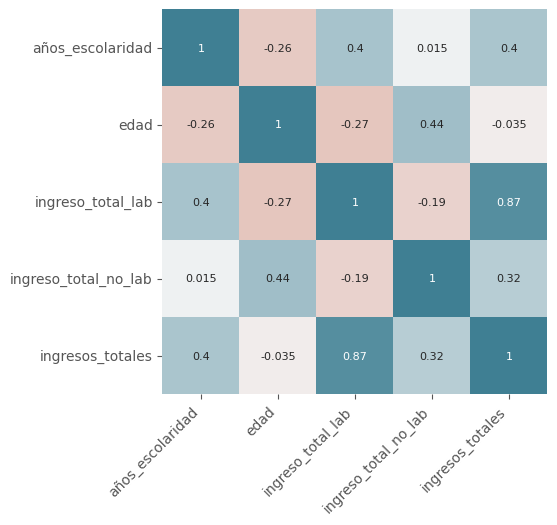

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

## b) Gráficos de dispersión entre variables
Graficos de dispersión entre las variables independientes con la dependiente
Se generan gráficos de dispersión para cada par de variables numéricas y histogramas para cada variable en la diagonal principal.

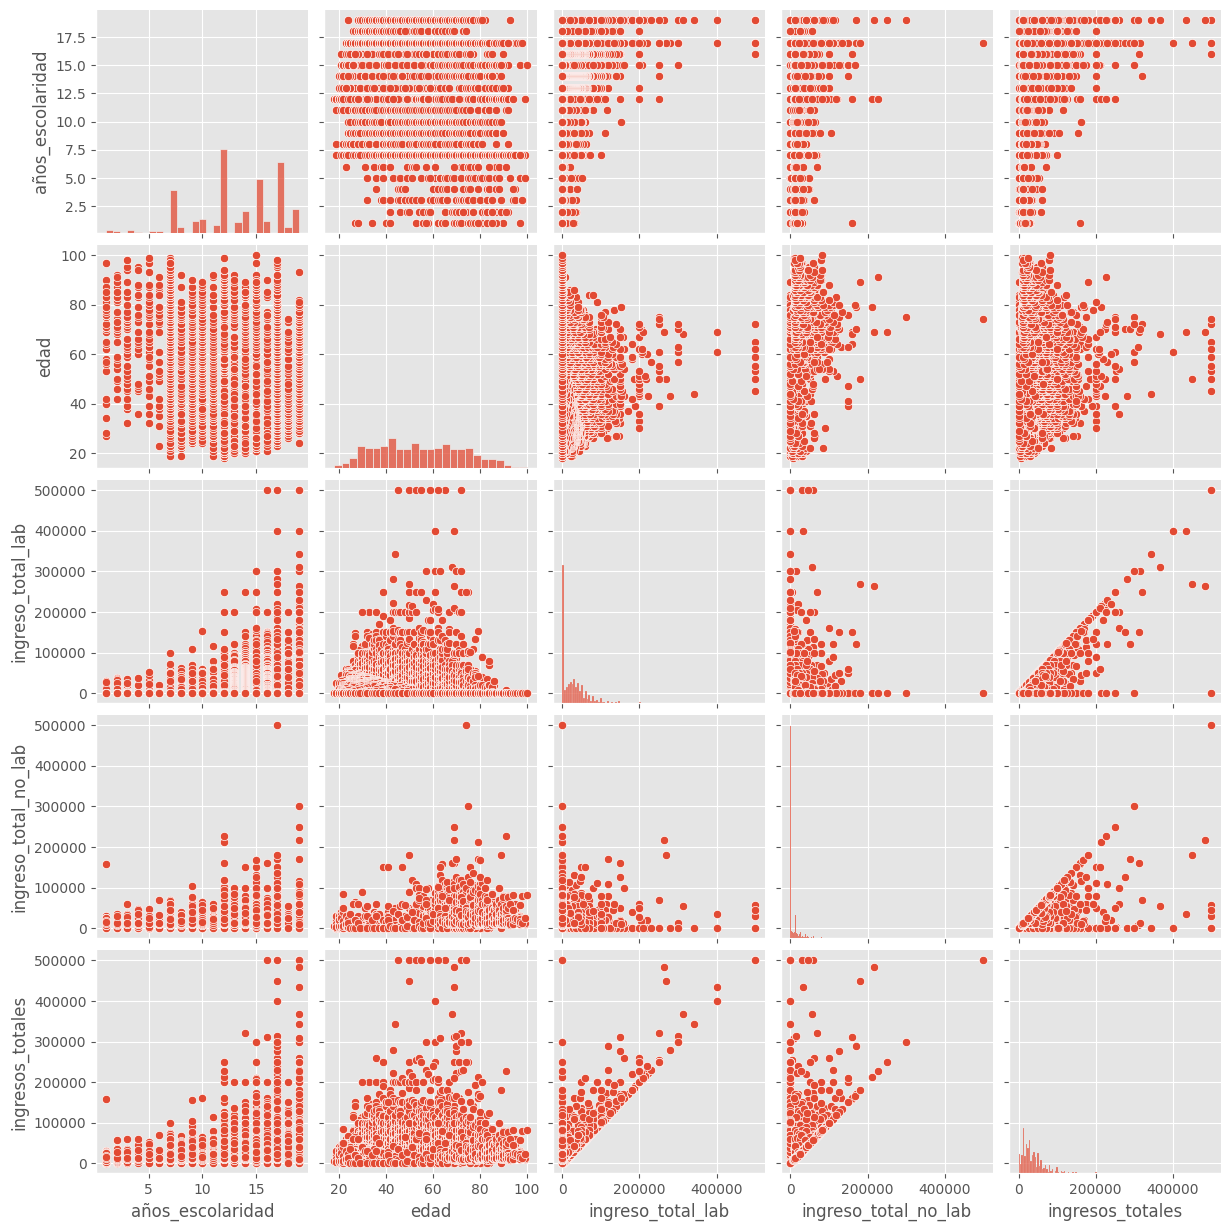

In [ ]:
sns.pairplot(datos_analisis)

#3) Módelo de regresión

El modelo que pretendemos estimar es el siguiente:

$$
\widehat{ingresos\_totales} = \hat{\beta}_0 + \hat{\beta}_1 \cdot edad + \hat{\beta}_2 \cdot años_escolaridad + \hat{\beta}_3 \cdot {ingresos\_total\_lab} + \hat{\beta}_4 \cdot {ingreso\_total\_no\_lab}
$$



In [ ]:
#X = datos_analisis[['años_escolaridad','edad','ingreso_total_lab','ingreso_total_no_lab']]
X = datos[['años_escolaridad','edad','ingreso_total_lab','ingreso_total_no_lab']]
y = datos_analisis['ingresos_totales']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1236,
                                        shuffle      = True
                                    )
# Check for infinite values
print(np.isinf(X_train).any())

# Check for NaN values
print(np.isnan(X_train).any())

# Replace infinite values with a large finite number or drop rows with infinite values
X_train = X_train.replace([np.inf, -np.inf], np.finfo(np.float64).max)


# Replace NaN values with a suitable imputation method (e.g., mean, median) or drop rows with NaN values
X_train = X_train.fillna(X_train.mean())


# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

años_escolaridad        False
edad                    False
ingreso_total_lab       False
ingreso_total_no_lab    False
dtype: bool
años_escolaridad        False
edad                    False
ingreso_total_lab       False
ingreso_total_no_lab    False
dtype: bool
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.581e+06
Date:                Sun, 30 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:21:17   Log-Likelihood:                -37375.
No. Observations:                4636   AIC:                         7.476e+04
Df Residuals:                    4631   BIC:                         7.479e+04
Df Model:                           4                                         
Covariance Type:         

Modelo:

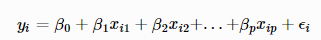

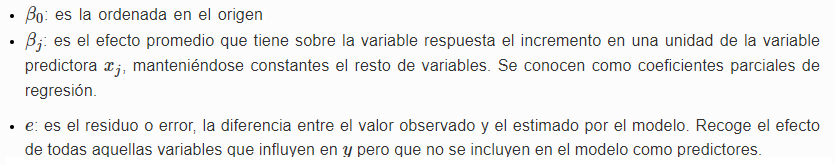


Por tanto el modelo que pretendemos estimar:

$$
\widehat{ingresos\_totales} = \hat{\beta}_0 + \hat{\beta}_1 \cdot edad + \hat{\beta}_2 \cdot años_escolaridad + \hat{\beta}_3 \cdot {ingresos\_total\_lab} + \hat{\beta}_4 \cdot {ingreso\_total\_no\_lab}
$$

equivale a =

ingresos_totales = 56.3860 + 16.1283 * años_escolaridad + -1.6978 * edad + 0.9945 * ingreso_total_lab + 0.9976 * ingreso_total_no_lab



#Significancia global del modelo

Vamos a evaluar si al menos una de las variables explicativas que forman el modelo contribuye de forma significativa. Para ello recurrimos al **F-test**. Es decir, lo que pretendemos contrastar son las siguientes hipótesis:

$$
H_o: {\beta}_1 = {\beta}_2 = ... = {\beta}_4= 0
$$

$$
H_1: \text{al menos un } {\beta}_i \neq 0 \\
$$

En el modelo presentado arriba, el valor del **estadístico F** es **3.581e+06** y tiene asociado un **p-valor** de **0.00**.

Estos valores estadisticos nos indican que hay evidencia muy fuerte para rechazar la hipótesis nula y concluir que el modelo de regresión es significativo, es decir, al menos uno de los predictores tiene un efecto significativo en la variable dependiente.

Sin embargo, esto no significa que todos los predictores sean significativos individualmente. Para determinar la significancia de cada predictor, deberíamos examinar los valores p asociados a cada coeficiente en la salida de la regresión.



#Significancia individual de los estimadores

En está sección nos interesa contrastar la significancia individual de cada uno de los **betas** estimados.
Para ello haremos uso del **estadístico *t***.

La prueba con el estadístico t consiste en evaluar las siguientes hipótesis:

$$
H_o: {\beta}_i = 0, \text{ con } i = 1, 2, ..., 5
$$

$$
H_1: {\beta}_i \neq 0, \text{ con } i = 1, 2, ..., 5 \\
$$



Basándonos en los valores t y los valores p podemos analizar la significancia de cada variable en el modelo:


const (Intercepto): Con un valor t de 0.915 y un valor p de 0.360, no podemos rechazar la hipótesis nula (H0: β_const = 0). Esto significa que el intercepto no es significativamente diferente de cero.


años_escolaridad: Con un valor t de 5.040 y un valor p de 0.000, rechazamos la hipótesis nula (H0: β_añosescolaridad = 0). Esto indica que los años de escolaridad tienen un efecto significativo en la variable dependiente.

edad: Con un valor t de -2309 y un valor p de 0.021, rechazamos la hipótesis nula (H0: β_edad = 0). Esto sugiere que la edad tiene un efecto significativo en la variable dependiente.

ingreso_total_lab: Con un valor t de 3256.447 y un valor p de 0.000, rechazamos la hipótesis nula (H0: β_ingreso_total_lab = 0). Esto indica que "ingreso_total_lab" tiene un efecto significativo en la variable dependiente.

ingreso_total_no_lab: Con un valor t de 1671.020 y un valor p de 0.000, rechazamos la hipótesis nula (H0: β_ingreso_total_no_lab = 0). Esto sugiere que "ingreso_total_no_lab" tiene un efecto significativo en la variable dependiente.

Conclusión:

Excepto por el intercepto, estimamos que todas las variables consideradas (años de escolaridad, edad, ingreso total laboral e ingreso total no laboral) tienen un efecto significativo en la variable dependiente (ingresos totales). Esto significa que estas variables son predictores útiles en el modelo.

# Calculamos predicción y residuos

In [ ]:
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
prediccion_test = modelo.predict(exog = sm.add_constant(X_test, prepend=True))
residuos_train   = prediccion_train - y_train


<ipython-input-14-41be233f6c4a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1043: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


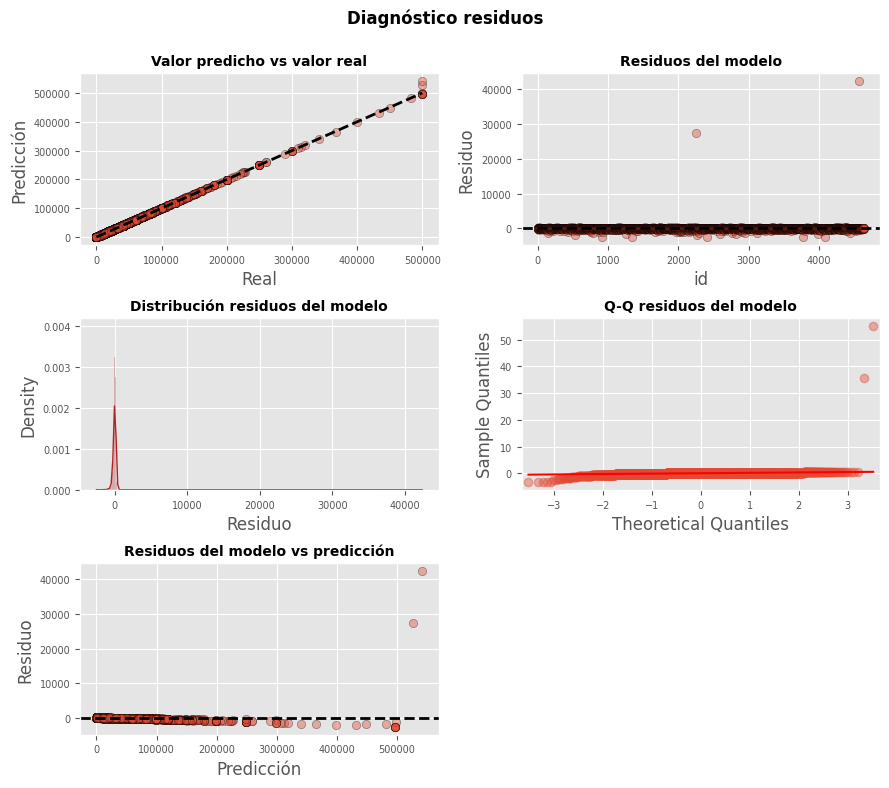

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1],
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Interpretación de los gráficos de residuos

Gráfico 1: Valor predicho vs valor real

Este gráfico muestra la relación entre los valores predichos por el modelo y los valores reales observados. Una línea recta perfecta indicaría que el modelo es perfecto en la predicción de los valores reales. En este caso, la nube de puntos se dispersa alrededor de la línea recta, lo que sugiere que el modelo es razonablemente bueno en la predicción de los valores reales.

Gráfico 2: Distribución de residuos del modelo

Este gráfico muestra la distribución de los residuos del modelo. Una distribución normal de residuos indicaría que el modelo es adecuado. En este caso, la distribución de los residuos parece ser aproximadamente normal, lo que sugiere que el modelo es adecuado. Sin embargo, hay una pequeña cantidad de residuos que se encuentran en las colas de la distribución, lo que podría indicar que hay algunos valores atípicos.

Gráfico 3: Q-Q residuos del modelo

Este gráfico muestra la distribución de los residuos del modelo en comparación con una distribución normal. Si los residuos se distribuyen normalmente, los puntos caerán en una línea recta. En este caso, los puntos se dispersan aproximadamente alrededor de la línea recta, lo que sugiere que los residuos se distribuyen aproximadamente normalmente. Sin embargo, hay algunos puntos que se desvían de la línea recta, lo que podría indicar que hay algunos valores atípicos.

Gráfico 4: Residuos del modelo vs predicción

Este gráfico muestra la relación entre los residuos del modelo y la predicción. Si los residuos son homocedásticos, no debería haber ningún patrón en este gráfico. En este caso, no hay ningún patrón evidente en el gráfico, lo que sugiere que los residuos son homocedásticos.

Conclusiones

En general, los gráficos de residuos sugieren que el modelo es razonablemente bueno en la predicción de los valores reales. Sin embargo, hay algunos puntos que se desvían significativamente de la línea recta, lo que podría indicar que hay algunos valores atípicos o que el modelo no es perfecto.

Por tanto, pensamos en posibles medidas para mejorar el módelo:

Investigar los valores atípicos. Es posible que los valores atípicos sean el resultado de errores de medición o de que no se ajusten al modelo. Si se puede identificar la causa de los valores atípicos, se pueden eliminar o corregir.

Aumentar el tamaño de la muestra. Un tamaño de muestra más grande puede ayudar a mejorar la precisión del modelo.


In [ ]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
SW2, p_value = stats.shapiro(residuos_train)
print(f"Estadítico= {SW2}, p-value = {p_value}")



Estadítico= 0.08126795291900635, p-value = 0.0


In [ ]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 14233.202653384054, p-value = 0.0


Interpretación:

Los valores p bajos (en este caso, 0.0 para ambas pruebas) indican que es muy poco probable que los residuos provengan de una distribución normal. Esto significa que el supuesto de normalidad de los residuos, uno de los supuestos clave de la regresión lineal, se ha violado.
La violación del supuesto de normalidad de los residuos puede afectar la validez de las inferencias estadísticas del modelo, como los valores p y los intervalos de confianza. Esto significa que los resultados del modelo pueden no ser confiables.


Sugerencias:

Considerar la posibilidad de transformar los datos.

Utilizar métodos de regresión robustos. En futuros análisis para mejorar se pueden utilizar métodos de regresión robustos, como la regresión lineal robusta o la regresión de mínimos cuadrados ponderados, que son menos sensibles a las violaciones del supuesto de normalidad.

Ampliar el tamaño de la muestra. En algunos casos, un tamaño de muestra más grande puede ayudar a reducir el impacto de la violación del supuesto de normalidad.



Inconveninete con el módelo (R-CUADRADO Y RESIDUOS (PUNTO ANTERIOR) y conclusiones del módelo:
Un R-cuadrado (R²) de 1.000 y un R-cuadrado ajustado (Adj. R²) de 1.000 en un modelo de regresión indican que el modelo se ajusta perfectamente a los datos. Esto significa que el modelo es capaz de explicar el 100% de la variabilidad en la variable dependiente.

Sin embargo, un R² de 1.000 es extremadamente raro en la práctica y a menudo sugiere que puede haber un problema con el modelo.

Conclusiones y recomendaciones para futuros análisis:

El análisis realizado indica que el modelo actual, a pesar de su alto R², no es necesariamente el más adecuado para explicar la variabilidad en la variable dependiente. Esto se debe a la posibilidad de sobreajuste y a la necesidad de considerar otros factores más allá del ajuste a los datos de entrenamiento.

Para futuros análisis, investigaremos e implementaremos técnicas que nos permitan hallar un módelo más adecuado y desarrollar modelos más robustos y confiables que puedan explicar mejor la variabilidad en la variable dependiente y generalizar a nuevos datos.
